**Assignment 1 - Titanic data analysis**

* Import data from drive or somewhere else
* Basic statistics
* Graphical analysis

**Dataset description**

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In [79]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [80]:
titanic = pd.read_excel("titanic_dataset.xls")
titanic.shape

(1309, 14)

In [81]:
#Remove all empty rows in the collunm age
titanic = titanic.dropna(subset=['age'])
titanic.shape

(1046, 14)

In [82]:
#Creating a new collunm named category for [Elderly, Adult, Teenager, Child]

def categorize_age(age):
    if age >= 60:
        return 'Elderly'
    elif age >= 18:
        return 'Adult'
    elif age >= 13:
        return 'Teenager'
    else:
        return 'Child'

# Aplicando a função para criar a nova coluna 'category'
titanic['category'] = titanic['age'].apply(categorize_age)

# Verifique o resultado
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,category
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Adult


In [94]:
#Total Quantity
quantity_data = {
    "male": len(titanic[titanic['sex']=='male']),
    "female": len(titanic[titanic['sex']=='female']),
    "first": len(titanic[titanic['pclass']==1]),
    "second": len(titanic[titanic['pclass']==2]),
    "third": len(titanic[titanic['pclass']==3]),
}
quantity_df = pd.DataFrame(quantity_data, index=[0])
quantity_df

,male,female,first,second,third
0,658,388,284,261,501


In [95]:
#Total survival
survived = titanic[titanic['survived']==1]
survived_data = {
    "male": len(survived[survived['sex']=='male']),
    "female": len(survived[survived['sex']=='female']),
    "first": len(survived[survived['pclass']==1]),
    "second": len(survived[survived['pclass']==2]),
    "third": len(survived[survived['pclass']==3]),
}
survived_df = pd.DataFrame(survived_data, index=[0])
survived_df

,male,female,first,second,third
0,135,292,181,115,131


In [96]:
#Total not survived
not_survived = titanic[titanic['survived']==0]
not_survived_data = {
    "male": len(not_survived[not_survived['sex']=='male']),
    "female": len(not_survived[not_survived['sex']=='female']),
    "first": len(not_survived[not_survived['pclass']==1]),
    "second": len(not_survived[not_survived['pclass']==2]),
    "third": len(not_survived[not_survived['pclass']==3]),
}
not_survived_df = pd.DataFrame(not_survived_data, index=[0])
not_survived_df

,male,female,first,second,third
0,523,96,103,146,370


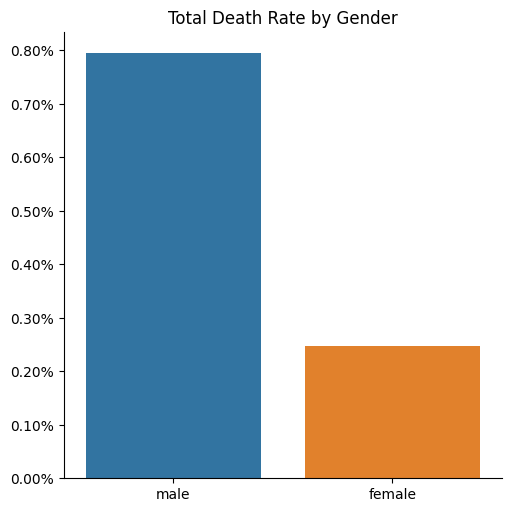

In [97]:
#Total death rate by male, female and child
res = not_survived_df/quantity_df
res[['male', 'female']]
fig = sns.catplot(data=res[['male', 'female']], kind='bar')

# Define o formato do eixo y como porcentagem para cada facet
for ax in fig.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Define o título do gráfico
fig.set(title='Total Death Rate by Gender')


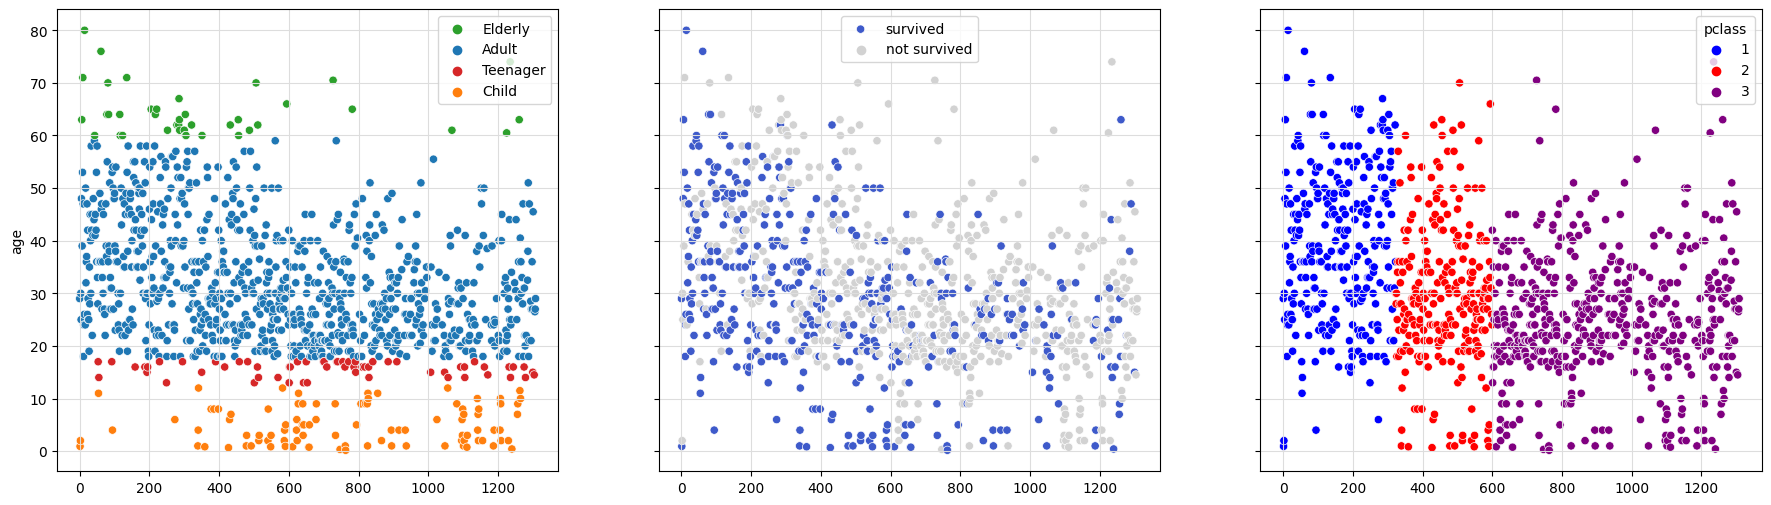

In [87]:
fig, axes = plt.subplots(1,3,sharey=True, sharex=True, figsize=(22,6))
g= sns.scatterplot(data=titanic, x=titanic.index, y='age', hue='category', ax=axes[0])
legend_order = ['Elderly', 'Adult', 'Teenager', 'Child']
handles, labels = g.get_legend_handles_labels()
handles = [handles[labels.index(category)] for category  in legend_order]
labels = legend_order
g.legend(handles, labels)
g.grid(True, color=grid_color)

custom_palette = ["#D2D2D2", "#3E5ACA"]
g1 = sns.scatterplot(data=titanic, x=titanic.index, y='age', hue='survived', ax=axes[1], palette=custom_palette)
g1.legend(labels=['survived', 'not survived'])
g1.grid(True, color=grid_color)

custom_palette = ["blue", "red", 'purple'] 
g2 = sns.scatterplot(data=titanic, x=titanic.index, y='age', hue='pclass',  ax=axes[2], palette=custom_palette)
g2.grid(True, color=grid_color)

**Analysis**

The first figure show that the marjority of the passagens were 

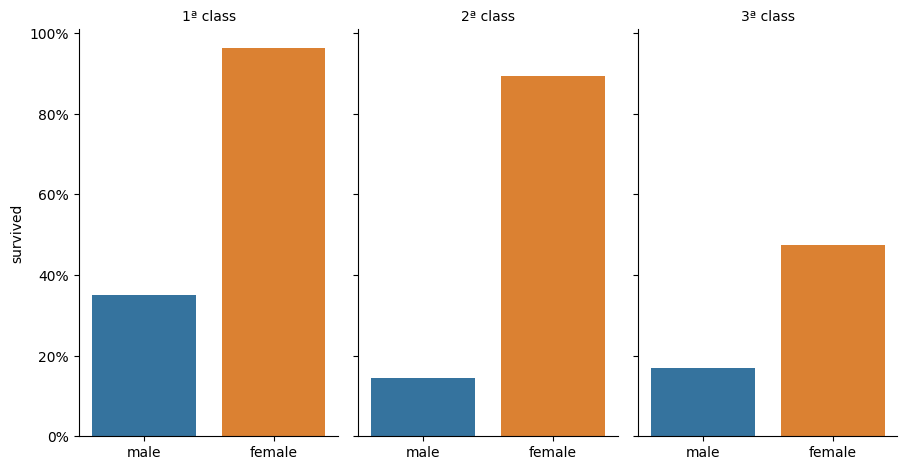

In [98]:
#Survival rate by class
new_order = ['male', 'female']
titanic['sex'] = pd.Categorical(titanic['sex'], categories=new_order, ordered=True)

g = sns.catplot(data=titanic, x='sex', y='survived', col="pclass", kind='bar', saturation=.7, errorbar=None, aspect=.6)

g.set_titles("{col_name}ª class")

for ax in g.axes.flat:
    ax.xaxis.set_label_text('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))


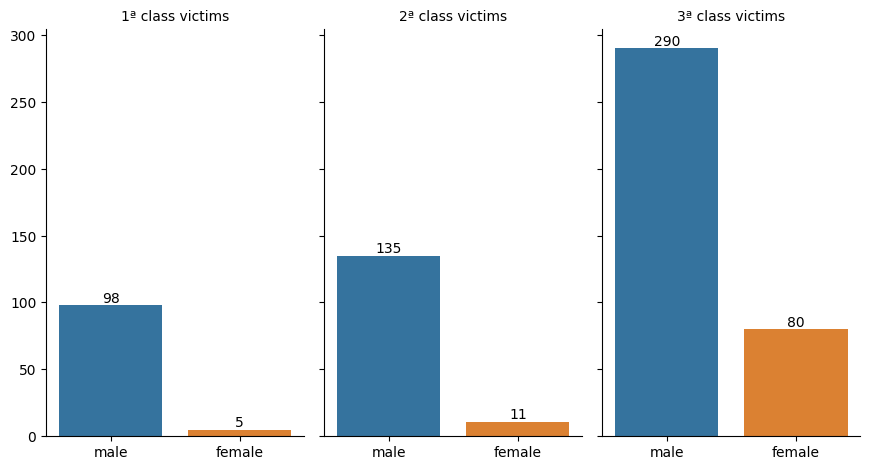

In [89]:
#Absolute number of deads by class
g = sns.catplot(data=titanic[titanic['survived']==0], x='sex', col="pclass", kind='count', saturation=.7, errorbar=None, aspect=.6)
g.set_titles("{col_name}ª class victims")
axes = g.axes

# Iterate over the axes and add the maximum value on top of each bar
for ax in axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, int(height),
                ha='center', va='bottom', fontsize=10, color='black')

for ax in g.axes.flat:
    ax.xaxis.set_label_text('')
    ax.yaxis.set_label_text('')

Text(0.5, 1.0, 'Third Class')

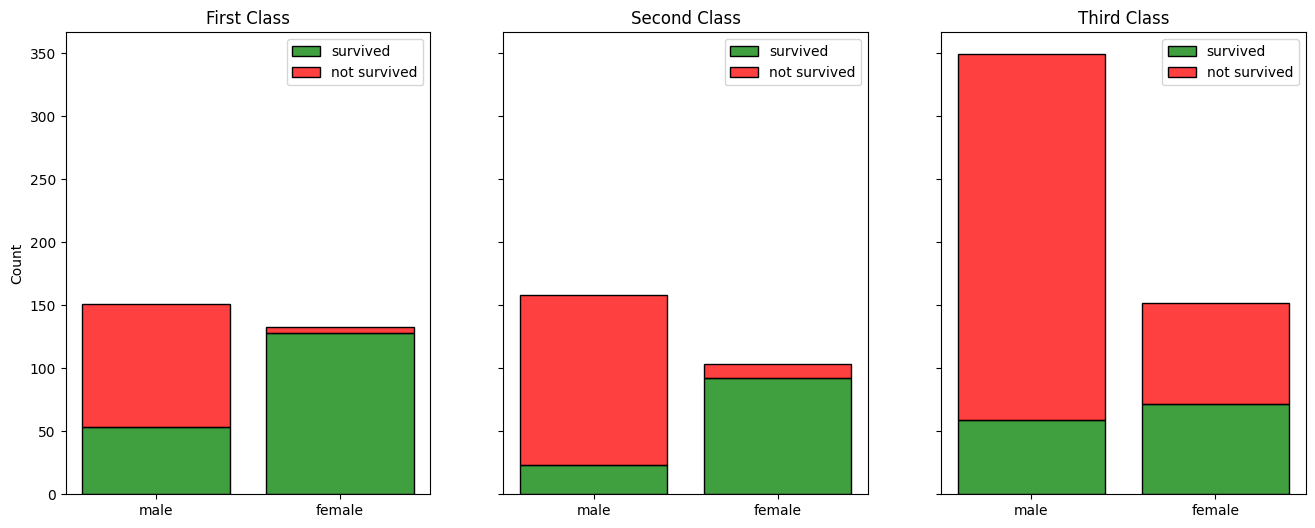

In [90]:
fig, axes = plt.subplots(1,3, figsize=(16,6), sharey=True)
custom_palette = ["red", "green"] 
order = [0, 1]
g1 = sns.histplot(data=titanic[titanic['pclass']==1], x="sex", hue='survived', hue_order=order, multiple='stack', shrink=0.8, ax=axes[0], palette=custom_palette)
g2 = sns.histplot(data=titanic[titanic['pclass']==2], x="sex", hue='survived', hue_order=order,  multiple='stack', shrink=0.8, ax=axes[1], palette=custom_palette)
g3 = sns.histplot(data=titanic[titanic['pclass']==3], x="sex", hue='survived', hue_order=order, multiple='stack', shrink=0.8, ax=axes[2], palette=custom_palette)

# Definindo o rótulo da legenda
g1.legend(labels=['survived', 'not survived'])
g2.legend(labels=['survived', 'not survived'])
g3.legend(labels=['survived', 'not survived'])

g1.set_xlabel('')
g1.set_title('First Class')
g2.set_xlabel('')
g2.set_title('Second Class')
g3.set_xlabel('')
g3.set_title('Third Class')

In [91]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,category
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Adult


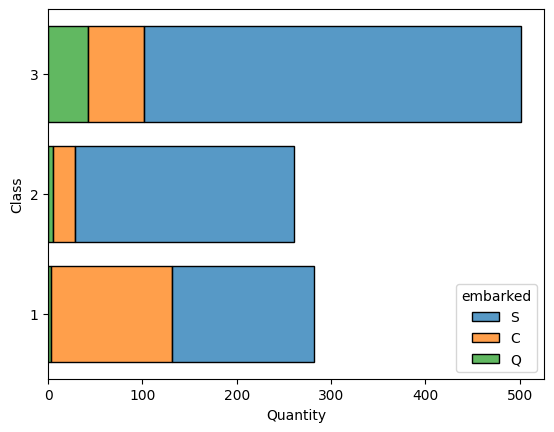

In [92]:
ax = sns.histplot(data=titanic, y='pclass', discrete=True, shrink=0.8, hue='embarked', multiple='stack')
ax.set(xlabel='Quantity', ylabel='Class')
ax.set_yticks([1 , 2, 3])
# plt.xticks(rotation=90)
plt.show()

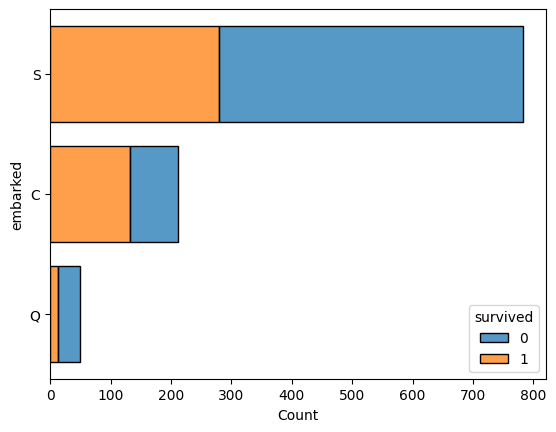

In [93]:
#Survival proportion by embark
ax = sns.histplot(data=titanic, y='embarked', discrete=True, shrink=0.8, hue='survived', multiple='stack')